In [2]:
import cu_rsc as cr
cr.setup_tables()
import RSC_sim
import numpy as np
import cupy as cp
import cupyx
import matplotlib.pyplot as plt

M_dev = cr.load_m_table_device()        # upload to GPU
res   = cr.resources_from_config(M_dev)

c:\Users\LyuQi\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
def score_sequence(mol):
    """Return (penalized_score, raw_survivors_in_region)."""
    
    n_x, n_y, n_z, is_lost, spin, mN = mol[:, 0], mol[:, 1], mol[:, 2], mol[:, 5], mol[:,4], mol[:,3]
    mask = (is_lost == 0) & (n_x == 0) & (n_y == 0) & (n_z == 0) & (spin == 0) & (mN == 1)
    raw = int(cp.count_nonzero(mask).get())
    return raw

### Check amplitude change in the original sequence

In [11]:
ori_seq = np.load("all_original.npy")

Raman pulses: 100%|██████████| 280/280 [00:49<00:00,  5.64it/s]


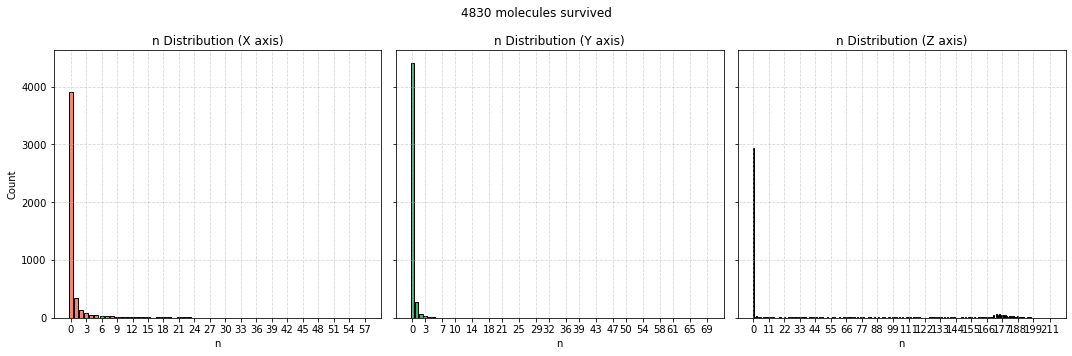

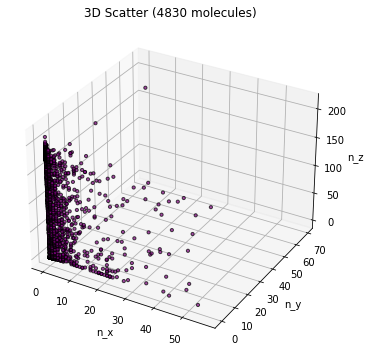

survival_rate_mean 0.483
mot_mean [ 1.12505176  0.21863354 45.973706  ]
mot_sem [0.00201176 0.00077625 0.03251767]
Ground state number 2784


In [12]:
temp = [25e-6, 25e-6, 25e-6]
mol_0 = cr.build_thermal_molecules_gpu(10_000, temp)
cr.raman_cool_with_pumping(mol_0, ori_seq, res, show_progress=True)
dist_gpu = cr.get_n_distribution_gpu(mol_0, max_bins=20)

result = cr.bootstrap_stats_from_molecules(mol_0)
print("survival_rate_mean", result['survival_rate_mean'])
print("mot_mean", result['mot_mean'])
print("mot_sem", result['mot_sem'])
print("Ground state number", score_sequence(mol_0))

In [13]:
op_amps = np.load("amp_ga_runs/AMPGA_20251203_115331/final_top5/top1_sequence.npy")

Raman pulses: 100%|██████████| 280/280 [00:48<00:00,  5.80it/s]


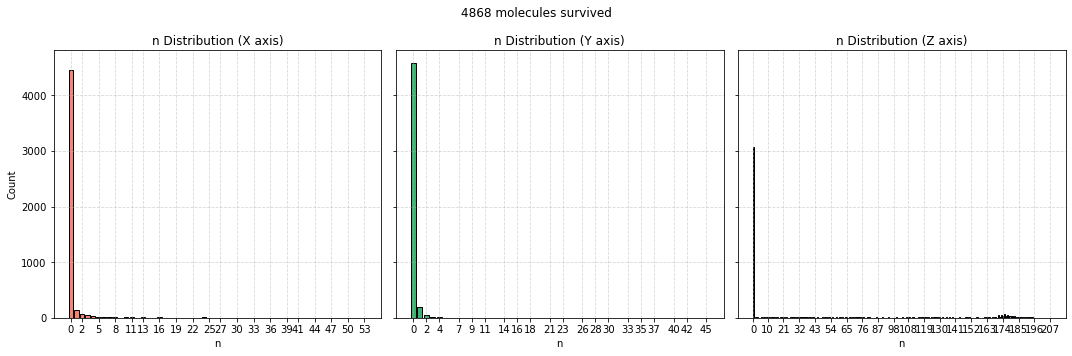

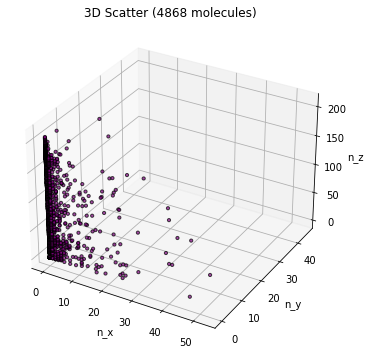

survival_rate_mean 0.4868
mot_mean [ 0.50493016  0.13660641 43.0532046 ]
mot_sem [0.00133792 0.00058617 0.03100487]
Ground state number 3041


In [14]:
temp = [25e-6, 25e-6, 25e-6]
mol_1 = cr.build_thermal_molecules_gpu(10_000, temp)
cr.raman_cool_with_pumping(mol_1, op_amps, res, show_progress=True)
dist_gpu = cr.get_n_distribution_gpu(mol_1, max_bins=20)

result = cr.bootstrap_stats_from_molecules(mol_1)
print("survival_rate_mean", result['survival_rate_mean'])
print("mot_mean", result['mot_mean'])
print("mot_sem", result['mot_sem'])
print("Ground state number", score_sequence(mol_1))

### Check amplitude change in optimzed sequence

In [6]:
op_seq = np.load("sequence_optimized.npy")

Raman pulses:   0%|          | 0/185 [00:00<?, ?it/s]

Raman pulses: 100%|██████████| 185/185 [00:32<00:00,  5.65it/s]


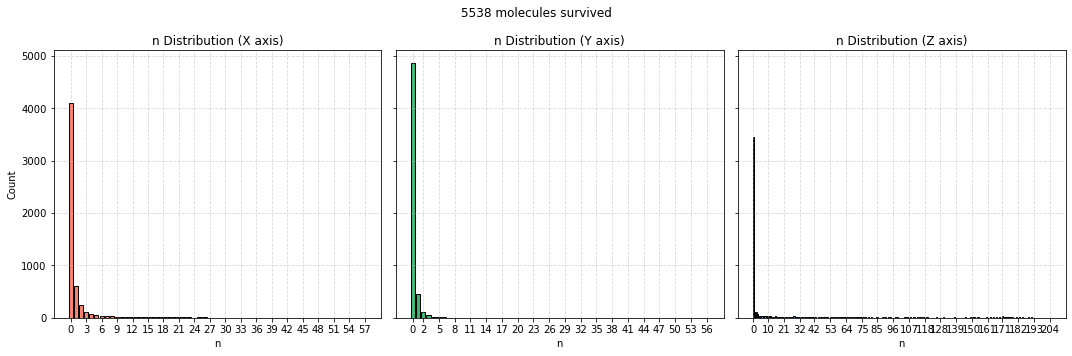

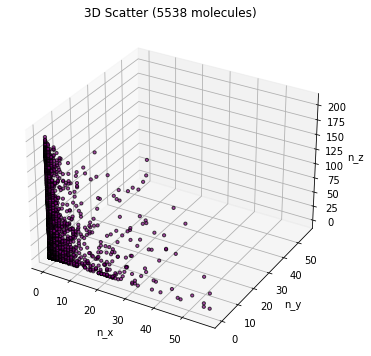

survival_rate_mean 0.5538
mot_mean [ 1.35734922  0.28060672 23.88678223]
mot_sem [0.0019747  0.00082275 0.0199638 ]
Ground state number 3083


In [7]:
temp = [25e-6, 25e-6, 25e-6]
mol_0 = cr.build_thermal_molecules_gpu(10_000, temp)
cr.raman_cool_with_pumping(mol_0, op_seq, res, show_progress=True)
dist_gpu = cr.get_n_distribution_gpu(mol_0, max_bins=20)

result = cr.bootstrap_stats_from_molecules(mol_0)
print("survival_rate_mean", result['survival_rate_mean'])
print("mot_mean", result['mot_mean'])
print("mot_sem", result['mot_sem'])
print("Ground state number", score_sequence(mol_0))

In [9]:
op_amps = np.load("amp_ga_runs/AMPGA_20251203_111306/final_top5/top1_sequence.npy")

Raman pulses: 100%|██████████| 185/185 [00:32<00:00,  5.77it/s]


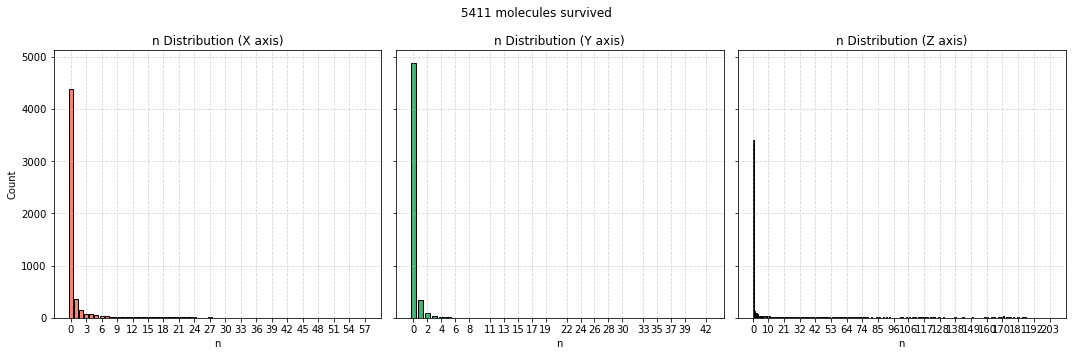

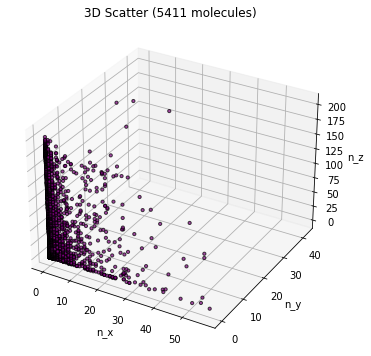

survival_rate_mean 0.5411
mot_mean [ 1.22269451  0.23637036 23.86046941]
mot_sem [0.00200362 0.00066997 0.02081296]
Ground state number 3261


In [10]:
temp = [25e-6, 25e-6, 25e-6]
mol_1 = cr.build_thermal_molecules_gpu(10_000, temp)
cr.raman_cool_with_pumping(mol_1, op_amps, res, show_progress=True)
dist_gpu = cr.get_n_distribution_gpu(mol_1, max_bins=20)

result = cr.bootstrap_stats_from_molecules(mol_1)
print("survival_rate_mean", result['survival_rate_mean'])
print("mot_mean", result['mot_mean'])
print("mot_sem", result['mot_sem'])
print("Ground state number", score_sequence(mol_1))